In [2]:
library(dplyr)
library(Seurat)
library(patchwork)
library(ggplot2)

In [3]:
sg <- readRDS('./stromal.gli_cluster.rds')

In [4]:
sg

An object of class Seurat 
24450 features across 3478 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

# Perform an integrated analysis

In [5]:
# specify that we will perform downstream analysis on the corrected data note that the original
# unmodified data still resides in the 'RNA' assay
DefaultAssay(sg) <- "integrated"

# Run the standard workflow for visualization and clustering
sg <- ScaleData(sg, verbose = FALSE)
sg <- RunPCA(sg, npcs = 30, verbose = FALSE)
sg <- RunUMAP(sg, reduction = "pca", dims = 1:27)
sg <- FindNeighbors(sg, reduction = "pca", dims = 1:27)
sg <- FindClusters(sg, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:47:23 UMAP embedding parameters a = 0.9922 b = 1.112

14:47:23 Read 3478 rows and found 27 numeric columns

14:47:23 Using Annoy for neighbor search, n_neighbors = 30

14:47:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:47:23 Writing NN index file to temp file /tmp/RtmppC3fAo/file1a014d2e7c96

14:47:23 Searching Annoy index using 1 thread, search_k = 3000

14:47:24 Annoy recall = 100%

14:47:25 Commencing smooth kNN distance calibration using 1 thread

14:47:25 Initializing fro

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3478
Number of edges: 120944

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9109
Number of communities: 16
Elapsed time: 0 seconds


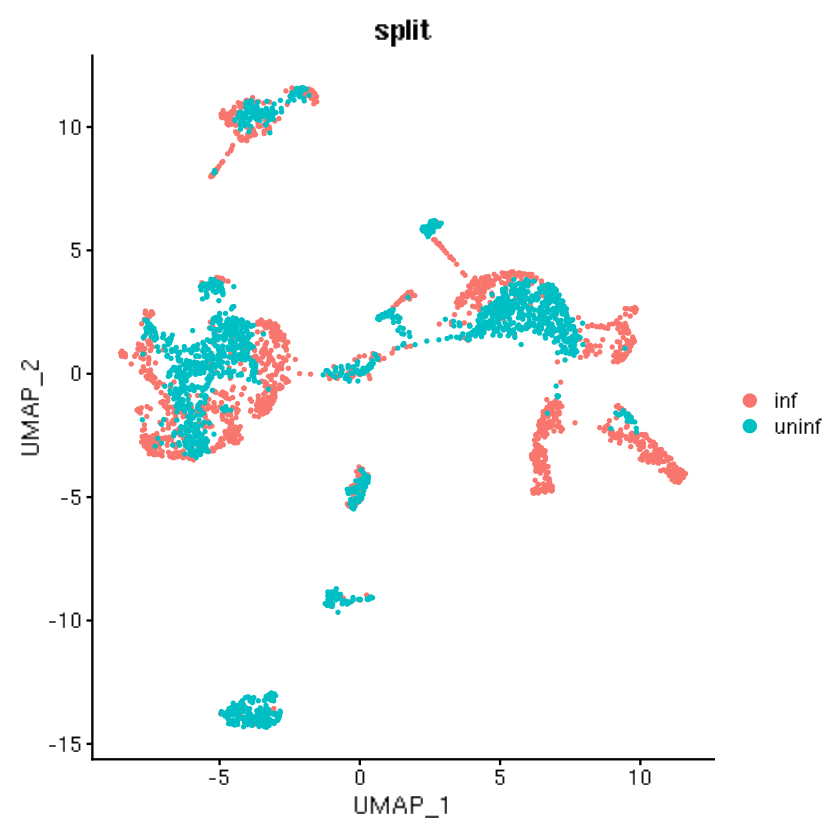

In [6]:
# Visualization
p1 <- DimPlot(sg, reduction = "umap", group.by = "split")
p2 <- DimPlot(sg, reduction = "umap", label = TRUE, repel = TRUE)
p1

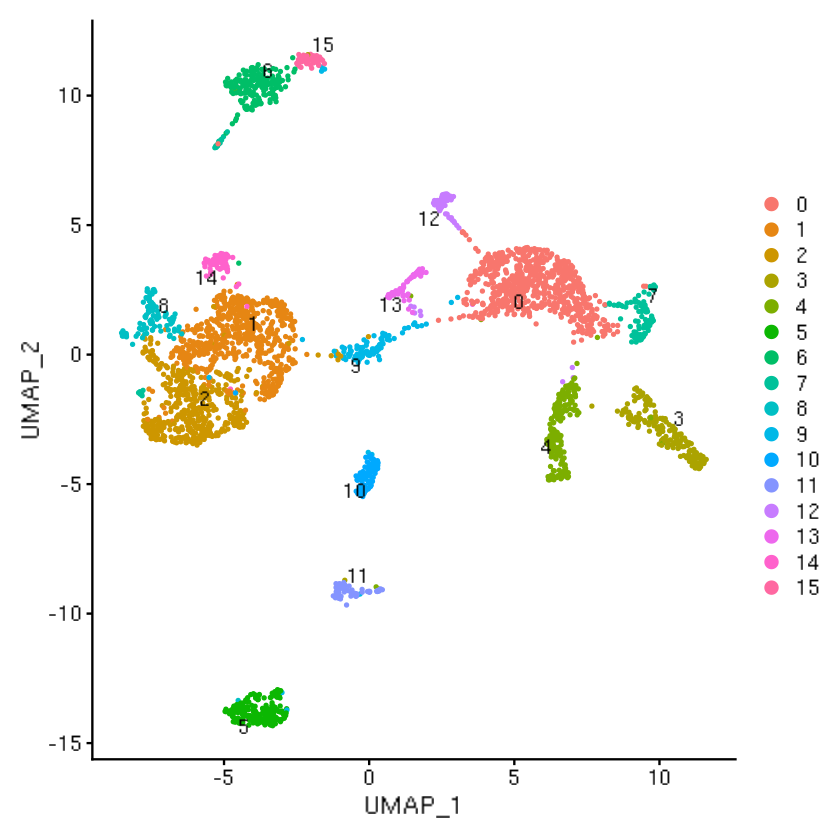

In [7]:
p2

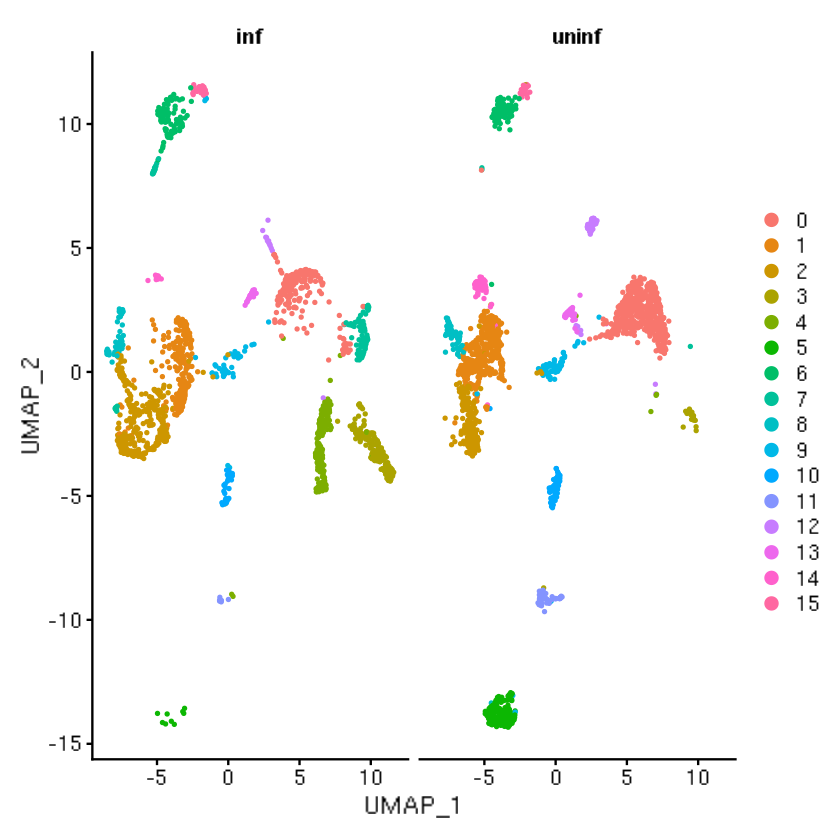

In [8]:
DimPlot(sg, reduction = "umap", split.by = "split")

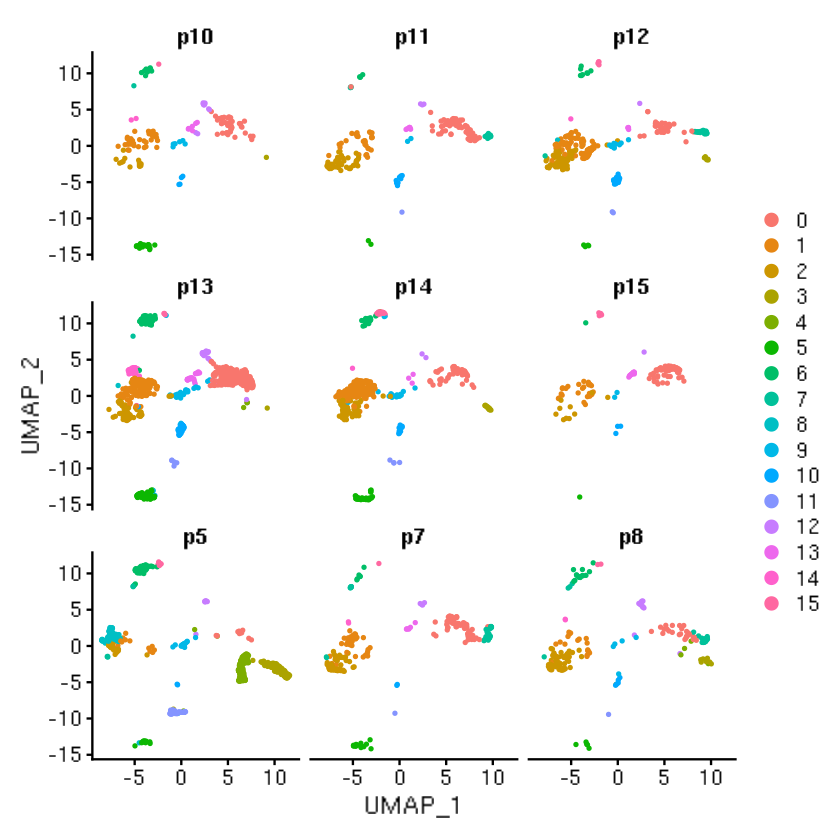

In [9]:
DimPlot(sg, reduction = "umap", split.by = "patient", ncol = 3)

# Naming clusters with cell type markers

In [10]:
Act.fib <- c('CHI3L1', 'PDPN', 'TNFRSF12A', 'MMP2', 'CTSK')
ACKR1 <- c('SELE', 'ACKR1', 'DUSP23', 'SELP')
Pericytes <- c('RGS5', 'NDUFA4L2')
Lymphatics <- c('PROX1', 'MMRN1', 'ANGPT2', 'CCL21', 'LYVE1', 'TFF3')
Fibroblast <- c('TCF21', 'CCL13', 'CCL8', 'ADAM28', 'HAPLN1', 'CFD')
CD36 <- c('CD36', 'CA4', 'FLT1', 'NOTCH4', 'TMEM88', 'ICAM2')
Smooth_muscle <- c('ACTG2')
Glial_cell <- c('TMEM71', 'AP1S2', 'SPP1', 'CLU', 'CNP', 'SLC22A17', 'ALDH1A1', 'PLP1', 'SCN7A', 'MPZ', 'NRXN1', 'SOX2',
               'MYOT', 'CDH19', 'ERBB3', 'S100B', 'GPM6B', 'HAND2', 'CRYAB', 'LGI4', 'CAB39L', 'PRIMA1', 'NTM', 'SORCS1',
               'CADM1')

In [ ]:
for (i in Act.fib) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in ACKR1) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in Pericytes) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in Lymphatics) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in Fibroblast) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in CD36) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in Smooth_muscle) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in Glial_cell) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [11]:
Act.fib <- c('CSF2', 'CXCL16', 'CXCL1', 'CXCL6', 'CXCL2', 'CXCL8', 'IL6', 'CXCL3')
ACKR1 <- c('IL33')
Lymphatics <- c('CCL14', 'CCL21')
Fibroblast <- c('CCL8', 'CCL13')
CD36 <- c('TNFSF10', 'CX3CL1')
Smooth_muscle <- c('TSLP')

In [ ]:
for (i in Act.fib) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in ACKR1) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in Lymphatics) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in Fibroblast) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in CD36) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in Smooth_muscle) {
    print(FeaturePlot(sg, features = i, min.cutoff = "q9"))
}

## Representative markers of each cluster

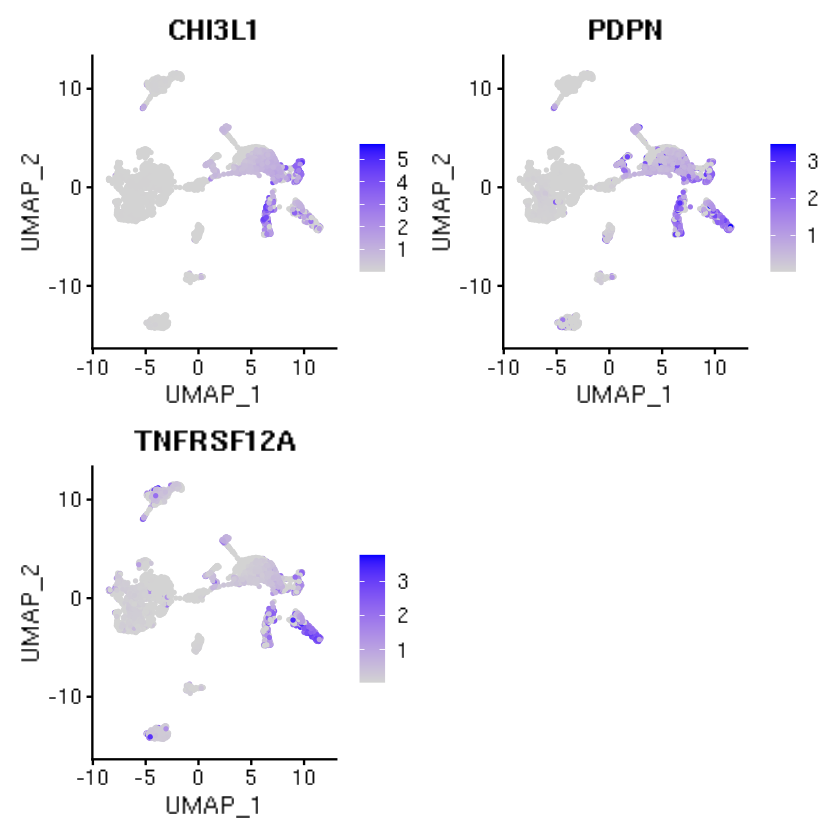

In [12]:
#act.fib
FeaturePlot(sg, features = c('CHI3L1', 'PDPN', 'TNFRSF12A'), min.cutoff = "q9")

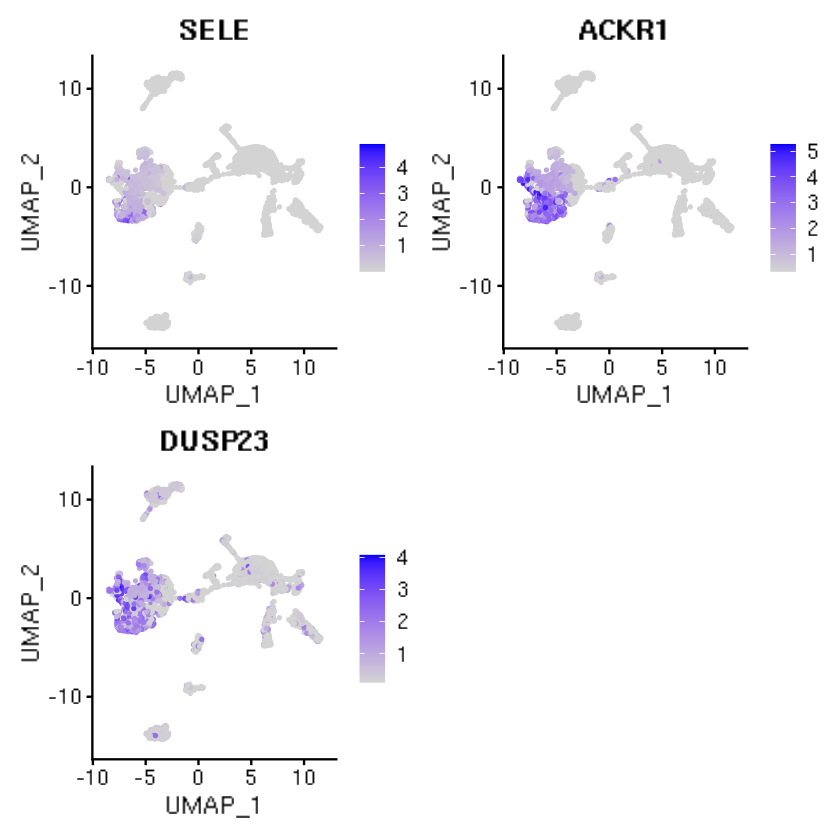

In [13]:
#ACKR1
FeaturePlot(sg, features = c('SELE', 'ACKR1', 'DUSP23'), min.cutoff = "q9")

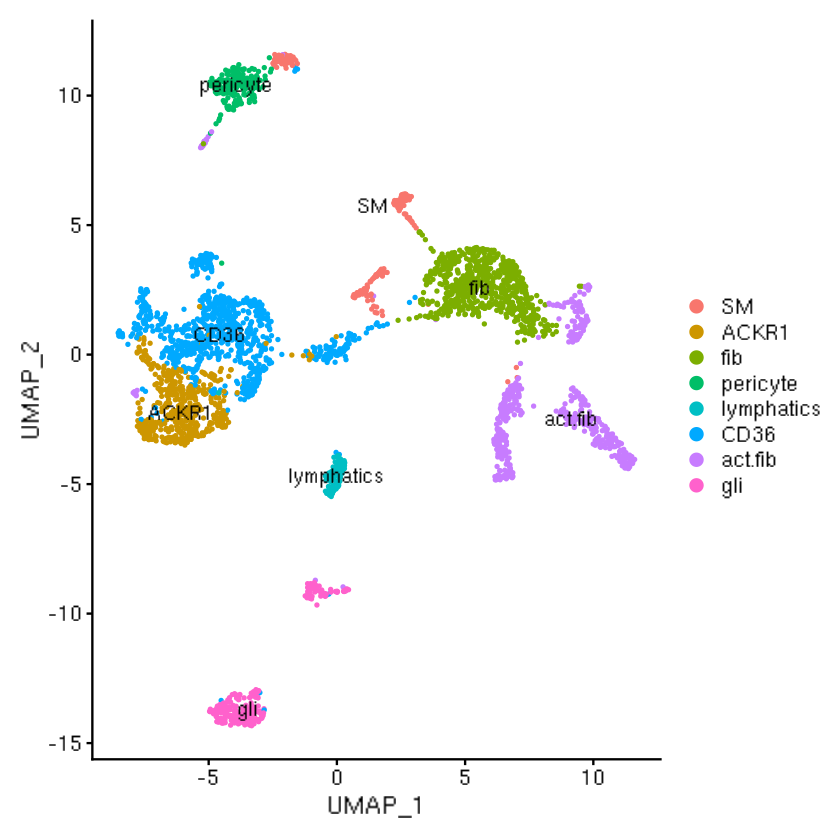

In [14]:
sg <- RenameIdents(sg, 
                   `15` = "SM", `12` = "SM", `13` = "SM",
                   `2` = "ACKR1",
                   `0` = "fib",
                   `6` = "pericyte",
                   `10` = "lymphatics",
                   `1` = "CD36", `8` = "CD36", `14` = "CD36", `9` = "CD36",
                   `3` = "act.fib", `4` = "act.fib", `7` = "act.fib",
                   `11` = "gli", `5` = 'gli')
DimPlot(sg, label = TRUE)

# Comparison of distributions of clusters

In [15]:
sg$celltype <- Idents(sg)
head(sg@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ep,percent.he,split,patient,integrated_snn_res.1.1,seurat_clusters,celltype,integrated_snn_res.0.5
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
inf_GSE134809_69_AAACGCACTTAGGC-1,GSE134809_69,5806,1726,0.6717189,0.1377885,0.00000000,inf,p5,15,3,act.fib,3
inf_GSE134809_69_AAACTTGAGTCACA-1,GSE134809_69,3802,1325,1.3413993,0.0000000,0.00000000,inf,p5,22,6,pericyte,6
inf_GSE134809_69_AAAGCAGATTTCGT-1,GSE134809_69,1438,691,1.5994437,0.9735744,0.00000000,inf,p5,18,2,ACKR1,2
inf_GSE134809_69_AAAGCCTGACTGTG-1,GSE134809_69,1642,814,8.7697929,0.0000000,0.06090134,inf,p5,15,3,act.fib,3
inf_GSE134809_69_AAAGTTTGTCTAGG-1,GSE134809_69,7848,1972,1.3506626,0.0764526,0.00000000,inf,p5,15,4,act.fib,4


### inf vs uninf

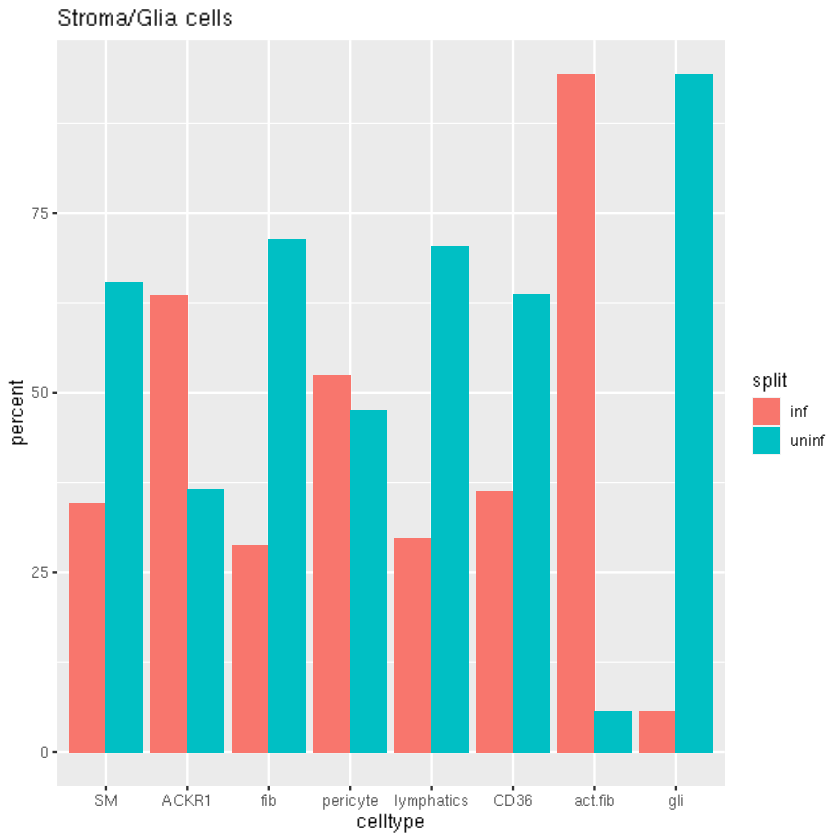

In [16]:
sg@meta.data %>%
  group_by(celltype, split) %>%
  count() %>%
  group_by(celltype) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup() %>%
  ggplot(aes(x=celltype, y=percent, fill=split)) +
  geom_col(position = 'dodge') +
  ggtitle("Stroma/Glia cells")

### comparison between inf and uninf tissues by patient

In [17]:
a <- sg@meta.data %>%
  filter(split == 'inf') %>%
  group_by(patient, split, celltype) %>%
  count() %>%
  group_by(patient) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup()
b <- sg@meta.data %>%
  filter(split == 'uninf') %>%
  group_by(patient, split, celltype) %>%
  count() %>%
  group_by(patient) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup()
#c <- rbind(a,b)

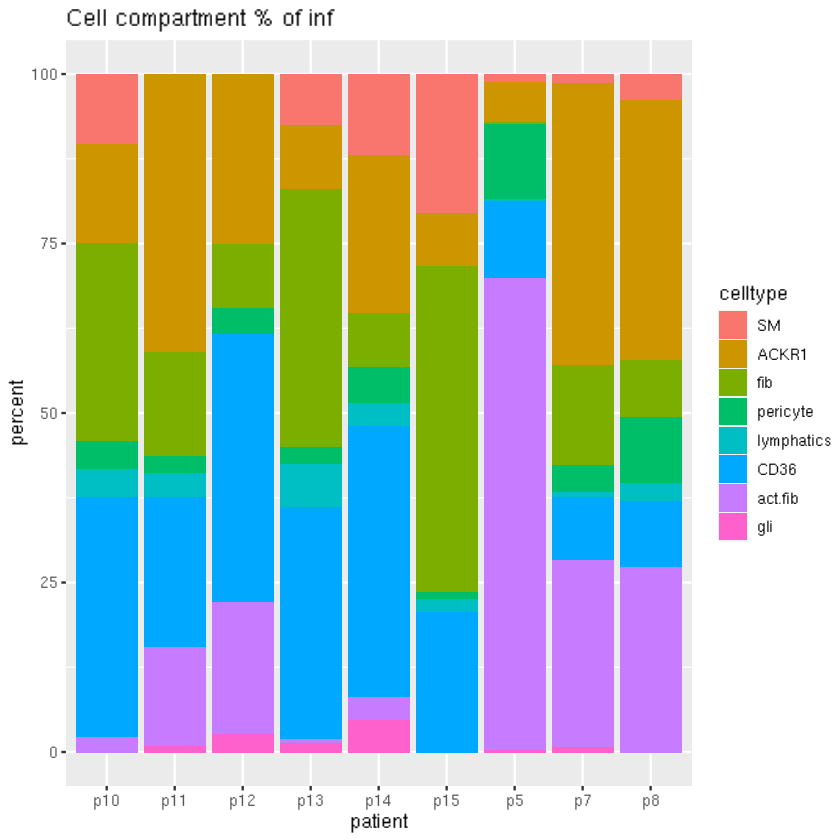

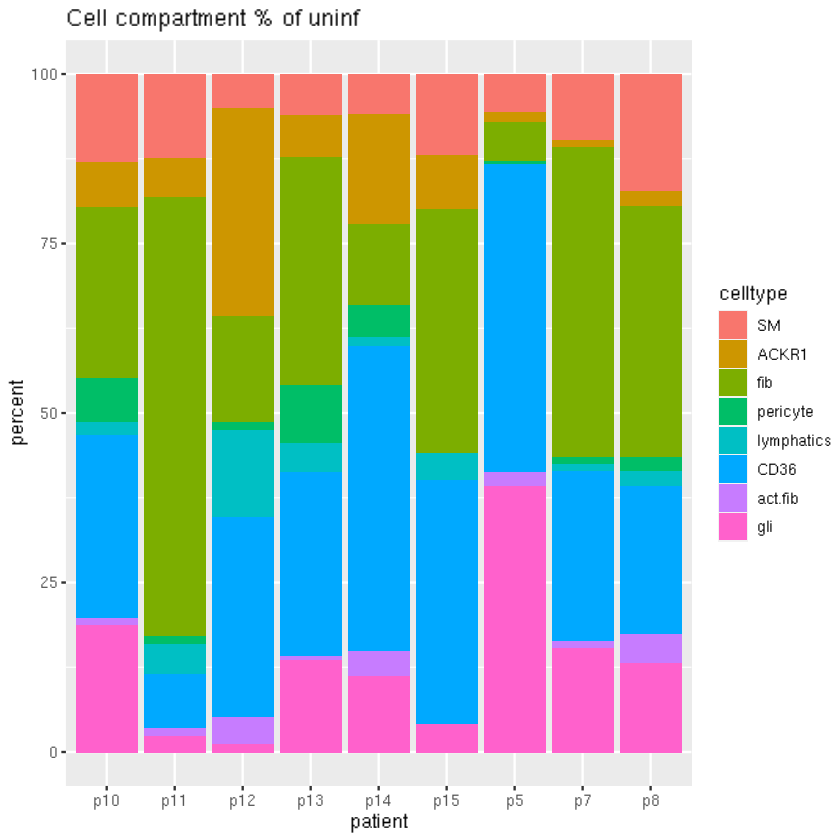

In [18]:
ggplot(a, aes(x=patient,y=percent, fill=celltype)) + geom_col() + ggtitle("Cell compartment % of inf")
ggplot(b, aes(x=patient,y=percent, fill=celltype)) + geom_col() + ggtitle("Cell compartment % of uninf")

In [ ]:
saveRDS(sg, file = "./stromal.gli_cluster_name.rds")

In [ ]:
ACKR1_actfib <- subset(sg, idents = c("ACKR1", "act.fib"))
saveRDS(ACKR1_actfib, file = "./ACKR1_actfib.rds")